In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, mean_absolute_percentage_error
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import warnings
from sklearn import metrics 

warnings.simplefilter('ignore')

In [2]:
ds = pd.read_csv("data_set.csv")
ds.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [3]:
X_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


y_column =  ['median_house_value']

X = ds[X_columns]
y = ds[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
def model_metrics(ml_model, X_train, y_train, X_test, y_test):
    return ([str(ml_model).split("(")[0], 
                       ml_model.score(X_train, y_train), 
                       ml_model.score(X_test, y_test),
                       np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                       np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                       mean_absolute_error(y_train, ml_model.predict(X_train)),
                       mean_absolute_error(y_test, ml_model.predict(X_test)),
                       mean_absolute_percentage_error(y_train, ml_model.predict(X_train)),
                       mean_absolute_percentage_error(y_test, ml_model.predict(X_test)),
                      ])
    

In [5]:
rf = RandomForestRegressor()



In [6]:
start = time.process_time()
result = []
ml_model = rf.fit(X_train, y_train)
temp_result = (model_metrics(ml_model, X_train, y_train, X_test, y_test))
print(str(rf).split("(")[0],"✓ ", "{}".format(round(time.process_time()-start,3)),"sec")

result_df = pd.DataFrame([temp_result], columns = ["Algorithm", "Train_Score", "Test_Score", "Train_RMSE",
                                         "Test_RMSE", "Train_MAE", "Test_MAE", "Train_MAPE", "Test_MAPE"])
result_df

RandomForestRegressor ✓  14.359 sec


,Algorithm,Train_Score,Test_Score,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Train_MAPE,Test_MAPE
0,RandomForestRegressor,0.988255,0.915792,14054.325062,37876.558757,7072.806472,18901.728989,0.040722,0.11026


In [7]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
%%time
# Create the random grid
param_grid = {'n_estimators': np.arange(25,55,10),
               'max_features': [0.5, 0.6, 0.8],
               'min_samples_split': [10,15],
               'min_samples_leaf': [3,4],
               'bootstrap': [False]}



rf = RandomForestRegressor()

grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid, 
                    scoring='neg_mean_absolute_percentage_error',
                    cv=5,
                    verbose = 3,
                    return_train_score=True)

grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=-0.061, test=-0.131) total time=   1.6s
[CV 2/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=-0.061, test=-0.130) total time=   1.8s
[CV 3/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=-0.061, test=-0.127) total time=   2.1s
[CV 4/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=-0.061, test=-0.123) total time=   2.1s
[CV 5/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=-0.061, test=-0.129) total time=   2.0s
[CV 1/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=35;, score=(train=-0.060, test

In [9]:

start = time.process_time()

rf = RandomForestRegressor(bootstrap = False, max_features = 0.6, min_samples_leaf = 3, min_samples_split = 10, n_estimators = 45)

ml_model = rf.fit(X_train, y_train)
temp_result = (model_metrics(ml_model, X_train, y_train, X_test, y_test))
print(str(rf).split("(")[0] + "Optimized","✓ ", "{}".format(round(time.process_time()-start,3)),"sec")

result_df = pd.DataFrame([temp_result], columns = ["Algorithm", "Train_Score", "Test_Score", "Train_RMSE",
                                         "Test_RMSE", "Train_MAE", "Test_MAE", "Train_MAPE", "Test_MAPE"])

result_df

RandomForestRegressorOptimized ✓  5.109 sec


,Algorithm,Train_Score,Test_Score,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Train_MAPE,Test_MAPE
0,RandomForestRegressor,0.979051,0.91308,18770.364062,38481.790622,9401.023576,20125.401865,0.052413,0.116235


### Аналіз важливості ознак для моделі

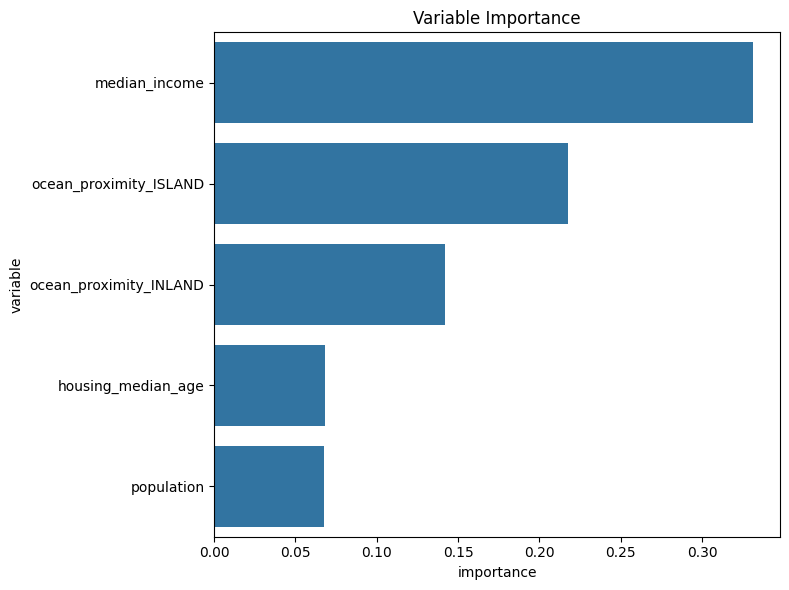

In [10]:
rankings = ml_model.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="variable",
            data=importance[:5])
plt.title('Variable Importance')
plt.tight_layout()